In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/keon/Desktop/walmart2/dtxwalmart/0221_0923_no_franchise_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286659 entries, 0 to 286658
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0.1    286659 non-null  int64  
 1   Unnamed: 0      286659 non-null  int64  
 2   Location ID     286659 non-null  int64  
 3   Location Name   286659 non-null  object 
 4   Address         286659 non-null  object 
 5   Provider        244673 non-null  object 
 6   Trade           244673 non-null  object 
 7   Category        244673 non-null  object 
 8   ProblemCode     244673 non-null  object 
 9   Tonnage         286659 non-null  float64
 10  Completed Date  286659 non-null  object 
 11  Region          244673 non-null  float64
 12  District        244673 non-null  float64
 13  Priority        23881 non-null   object 
 14  Zip code        41986 non-null   float64
 15  City            286659 non-null  object 
 16  State           286659 non-null  object 
 17  Latitude  

/var/folders/rc/2n83tm652837dxjbhsw257_m0000gn/T/ipykernel_40928/44590092.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/keon/Desktop/walmart2/dtxwalmart/0221_0923_no_franchise_data.csv')


<div style="font-size: 25px;">
Splitting data into supercenter and non-supercenter locations, taking out 0s in tonnage
<div>

In [3]:
def tonnage_pickups_filter(df):
    # Ensure the 'Completed Date' is a datetime object
    df['Completed Date'] = pd.to_datetime(df['Completed Date'])
    
    # Sum 'Tonnage' by 'Location ID' and 'Completed Date'
    summed_tonnages = df.groupby(['Location ID', 'Completed Date'])['Tonnage'].sum().reset_index(name='Summed Tonnage')
    
    # Merge the original DataFrame with the summed tonnages, dropping the original 'Tonnage' before merging
    merged_df = df.drop(columns='Tonnage').merge(summed_tonnages, on=['Location ID', 'Completed Date'])
    
    # Rename 'Summed Tonnage' back to 'Tonnage'
    merged_df.rename(columns={'Summed Tonnage': 'Tonnage'}, inplace=True)
    
    # Drop duplicates to keep only one row per group
    final_df = merged_df.drop_duplicates(subset=['Location ID', 'Completed Date'])
    
    return final_df


def split_supercenter(df):
    supercenter_df = df[df['Location Name'].str.contains('Supercenter')]
    non_supercenter_df = df[~df['Location Name'].str.contains('Supercenter')]
    return supercenter_df, non_supercenter_df

df = tonnage_pickups_filter(df)
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
supercenter_df, non_supercenter_df = split_supercenter(df)



In [4]:
supercenter_df

,Location ID,Location Name,Address,Provider,Trade,Category,ProblemCode,Completed Date,Region,District,Priority,Zip code,City,State,Latitude,Longitude,Tonnage
0,5051,WM Supercenter,920 47TH AVE,NaN,NaN,NaN,NaN,2021-02-01,NaN,NaN,NaN,80634.0,GREELEY,CO,40.422824,-104.754675,3.51
1,1370,WM Supercenter,2840 HIGHWAY 95,NaN,NaN,NaN,NaN,2021-02-01,NaN,NaN,NaN,86442.0,BULLHEAD CITY,AZ,35.082515,-114.594161,7.48
2,3620,WM Supercenter,13502 HAMILTON VIEW RD,NaN,NaN,NaN,NaN,2021-02-01,NaN,NaN,NaN,84065.0,RIVERTON,UT,40.505236,-111.977516,8.78
4,2767,WM Supercenter,4505 E MCKELLIPS RD,NaN,NaN,NaN,NaN,2021-02-01,NaN,NaN,NaN,85215.0,MESA,AZ,33.449221,-111.733746,8.49
5,3799,WM Supercenter,240 W BASELINE RD,NaN,NaN,NaN,NaN,2021-02-01,NaN,NaN,NaN,85210.0,MESA,AZ,33.380761,-111.836721,7.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286650,4200,Supercenter FS Reg 33A-7 Rod Stephens,6475 GATEWAY ROAD,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,2023-09-01,14.0,16.0,Scheduled Service,NaN,COLUMBUS,GA,32.538555,-84.876784,1.94
286651,1225,Supercenter FS Reg 34A-2 Eric Sherman,899 BLANDING BLVD,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,2023-09-01,3.0,101.0,Scheduled Service,NaN,ORANGE PARK,FL,30.137721,-81.768891,4.26
286653,2966,Supercenter FS Reg 24E-7 Daniel Duffy,222 SMOKERISE DR,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,2023-09-01,20.0,215.0,Scheduled Service,NaN,WADSWORTH,OH,41.052608,-81.724969,2.17
286657,2071,Supercenter FS Reg 1M-1 Tim Weaver,8900 OLD SEWARD HWY,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,2023-09-01,60.0,469.0,Scheduled Service,NaN,ANCHORAGE,AK,61.140195,-149.869863,5.66


In [5]:
non_supercenter_df

,Location ID,Location Name,Address,Provider,Trade,Category,ProblemCode,Completed Date,Region,District,Priority,Zip code,City,State,Latitude,Longitude,Tonnage
3,6090,Grocery,5400 W HIGHWAY 83,NaN,NaN,NaN,NaN,2021-02-01,NaN,NaN,NaN,84307.0,CORINNE,UT,41.560951,-112.143230,10.60
15,3845,Neighborhood Market,6645 W PEORIA AVE,NaN,NaN,NaN,NaN,2021-02-01,NaN,NaN,NaN,85302.0,GLENDALE,AZ,33.580224,-112.201923,9.07
16,6426,Sam's Club,2919 MARKET PL,NaN,NaN,NaN,NaN,2021-02-01,NaN,NaN,NaN,67401.0,SALINA,KS,38.785987,-97.608815,7.63
18,6683,Sam's Club,6525 S STATE ST,NaN,NaN,NaN,NaN,2021-02-01,NaN,NaN,NaN,84107.0,MURRAY,UT,40.630417,-111.886622,9.24
19,6019,Regional,7500 E CROSSROADS BLVD,NaN,NaN,NaN,NaN,2021-02-01,NaN,NaN,NaN,80538.0,LOVELAND,CO,40.432930,-104.970770,5.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286635,2465,Neighborhood Market FS Reg 33A-6 Rod Stephens,3697 WINDSOR SPRING RD,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,2023-09-01,59.0,554.0,Scheduled Service,NaN,HEPHZIBAH,GA,33.378783,-82.073098,0.00
286652,5344,Walmart FS Reg 44F-1 Josh Thaxton,1238 PUTTY HILL AVE STE 5,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,2023-09-01,75.0,281.0,Scheduled Service,NaN,TOWSON,MD,39.395207,-76.580363,7.28
286654,3478,Walmart FS Reg 2M-5 Nick Paladino,700 KEEAUMOKU ST,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,2023-09-01,57.0,470.0,Scheduled Service,NaN,HONOLULU,HI,21.294903,-157.843233,1.02
286655,5274,Walmart FS Reg 2M-5 Nick Paladino,1131 KUALA ST,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,2023-09-01,57.0,470.0,Scheduled Service,NaN,PEARL CITY,HI,21.397174,-157.974452,3.03


In [6]:
def drop_zero_tonnage_rows(df):
    df = df[df['Tonnage'] != 0]
    return df

supercenter_df = drop_zero_tonnage_rows(supercenter_df)
non_supercenter_df = drop_zero_tonnage_rows(non_supercenter_df)

<div style="font-size: 25px;">
Plotting the distribution of tonnages in supercenter and non-supercenter locations
<div>

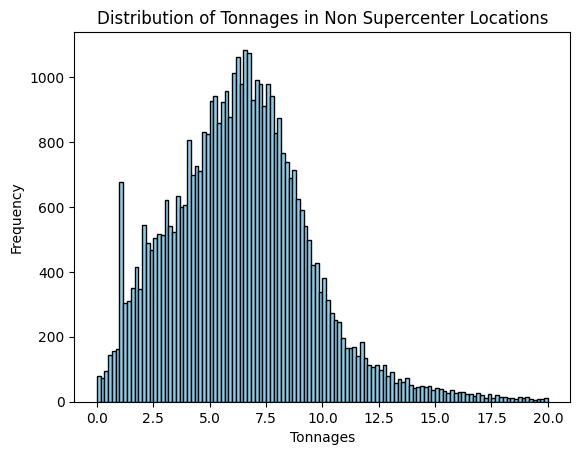

In [7]:
plt.hist(non_supercenter_df['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('Distribution of Tonnages in Non Supercenter Locations')
plt.show()

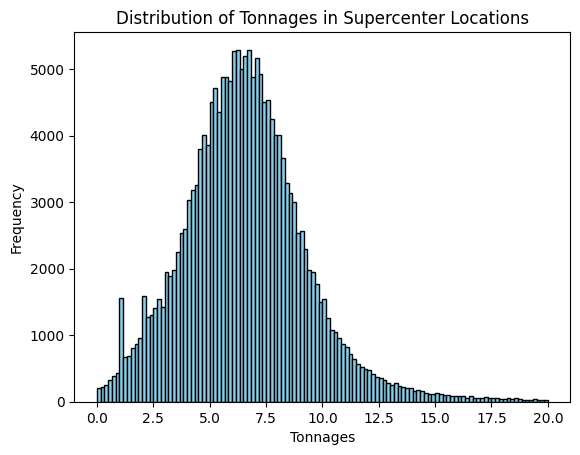

In [8]:
plt.hist(supercenter_df['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('Distribution of Tonnages in Supercenter Locations')
plt.show()

In [9]:
regular_walmart_df = non_supercenter_df[~non_supercenter_df['Location Name'].str.contains('Neighborhood')]
neighborhood_walmart_df = non_supercenter_df[non_supercenter_df['Location Name'].str.contains('Neighborhood')]


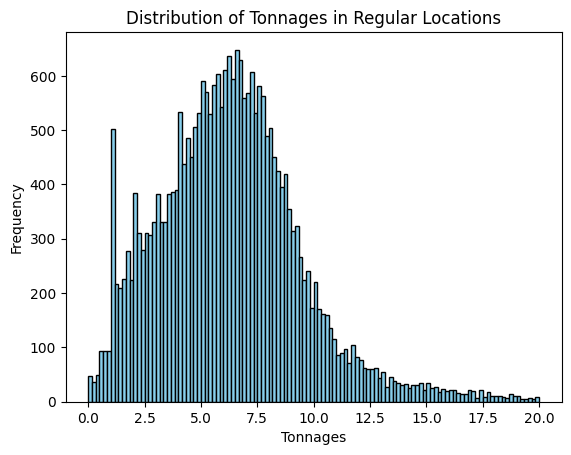

In [10]:
plt.hist(regular_walmart_df['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('Distribution of Tonnages in Regular Locations')
plt.show()

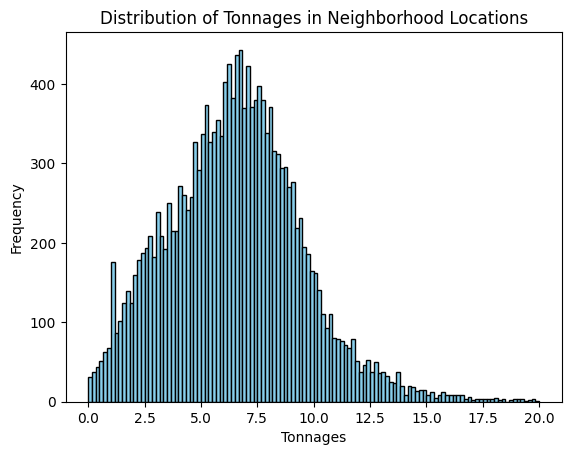

In [11]:
plt.hist(neighborhood_walmart_df['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('Distribution of Tonnages in Neighborhood Locations')
plt.show()

<div style="font-size: 25px;">
Ermmm guys there seems to be no difference between regular and neighborhood walmart locations 🤓. However, supercenter locations seem to have more normally distributed tonnages than non-supercenter locations!!
<div>

In [12]:
non_supercenter_df['Completed Date'] = pd.to_datetime(non_supercenter_df['Completed Date'])
supercenter_df['Completed Date'] = pd.to_datetime(supercenter_df['Completed Date'])

/var/folders/rc/2n83tm652837dxjbhsw257_m0000gn/T/ipykernel_40928/3524380976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_supercenter_df['Completed Date'] = pd.to_datetime(non_supercenter_df['Completed Date'])
/var/folders/rc/2n83tm652837dxjbhsw257_m0000gn/T/ipykernel_40928/3524380976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercenter_df['Completed Date'] = pd.to_datetime(supercenter_df['Completed Date'])


<div style="font-size: 25px;">
adding new column: days since last pickup
<div>

In [13]:
supercenter_df['Days Since Last Pickup'] = supercenter_df.groupby('Location ID')['Completed Date'].diff().dt.days
supercenter_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)
#supercenter_df.drop(columns = ['Unnamed: 0'])

/var/folders/rc/2n83tm652837dxjbhsw257_m0000gn/T/ipykernel_40928/3080527154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercenter_df['Days Since Last Pickup'] = supercenter_df.groupby('Location ID')['Completed Date'].diff().dt.days
/var/folders/rc/2n83tm652837dxjbhsw257_m0000gn/T/ipykernel_40928/3080527154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercenter_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)


In [14]:
non_supercenter_df['Days Since Last Pickup'] = non_supercenter_df.groupby('Location ID')['Completed Date'].diff().dt.days
non_supercenter_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)
#non_supercenter_df.drop(columns = ['Unnamed: 0'])

/var/folders/rc/2n83tm652837dxjbhsw257_m0000gn/T/ipykernel_40928/2142572161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_supercenter_df['Days Since Last Pickup'] = non_supercenter_df.groupby('Location ID')['Completed Date'].diff().dt.days
/var/folders/rc/2n83tm652837dxjbhsw257_m0000gn/T/ipykernel_40928/2142572161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_supercenter_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)


In [15]:
supercenter_avg_days = supercenter_df.groupby('Location ID')['Days Since Last Pickup'].mean()
supercenter_avg_days = pd.DataFrame(supercenter_avg_days)
supercenter_avg_days



,Days Since Last Pickup
Location ID,
1,8.292035
3,10.263736
7,8.423423
9,12.520000
10,10.388889
...,...
7301,11.688312
7324,11.884615
7326,11.961538


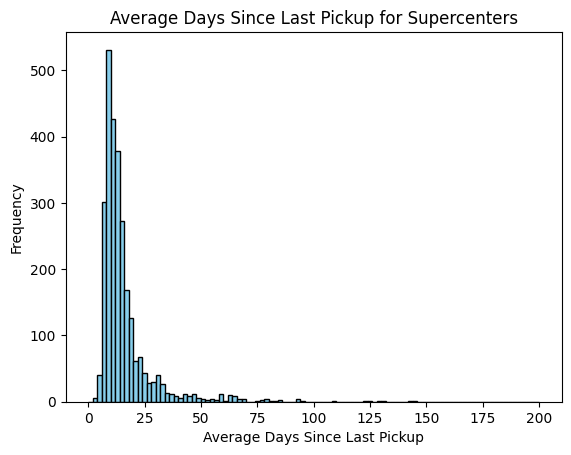

In [16]:
plt.hist(supercenter_avg_days['Days Since Last Pickup'], bins=100, range=(0, 200), color='skyblue', edgecolor='black')
plt.xlabel('Average Days Since Last Pickup')
plt.ylabel('Frequency')
plt.title('Average Days Since Last Pickup for Supercenters')
plt.show()

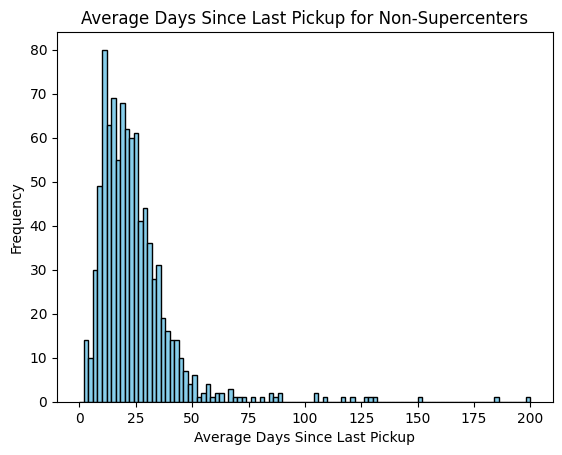

In [17]:
non_supercenter_avg_days = non_supercenter_df.groupby('Location ID')['Days Since Last Pickup'].mean()
non_supercenter_avg_days = pd.DataFrame( non_supercenter_avg_days)


plt.hist(non_supercenter_avg_days['Days Since Last Pickup'], bins=100, range=(0, 200), color='skyblue', edgecolor='black')
plt.xlabel('Average Days Since Last Pickup')
plt.ylabel('Frequency')
plt.title('Average Days Since Last Pickup for Non-Supercenters')
plt.show()

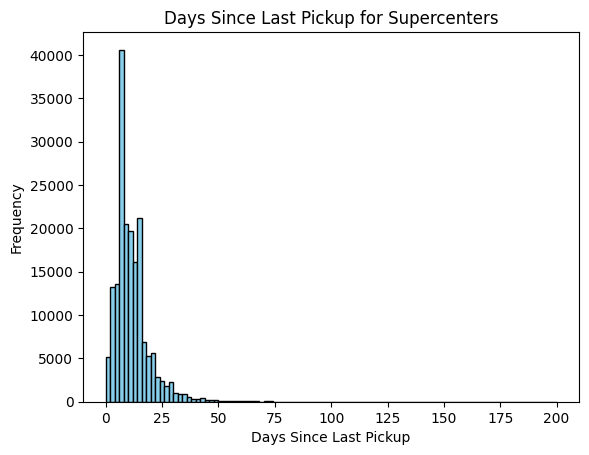

In [18]:
plt.hist(supercenter_df['Days Since Last Pickup'], bins=100, range=(0, 200), color='skyblue', edgecolor='black')
plt.xlabel('Days Since Last Pickup')
plt.ylabel('Frequency')
plt.title('Days Since Last Pickup for Supercenters')
plt.show()

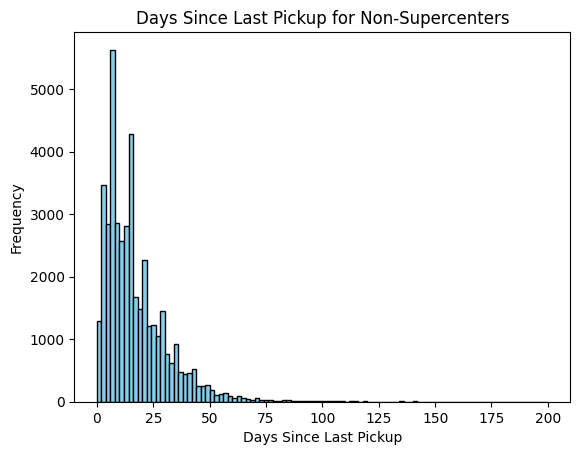

In [19]:
plt.hist(non_supercenter_df['Days Since Last Pickup'], bins=100, range=(0, 200), color='skyblue', edgecolor='black')
plt.xlabel('Days Since Last Pickup')
plt.ylabel('Frequency')
plt.title('Days Since Last Pickup for Non-Supercenters')
plt.show()

In [20]:
supercenter_20 = supercenter_df[supercenter_df['Completed Date'].dt.year == 2020]
supercenter_21 = supercenter_df[supercenter_df['Completed Date'].dt.year == 2021]
supercenter_22 = supercenter_df[supercenter_df['Completed Date'].dt.year == 2022]
supercenter_23 = supercenter_df[supercenter_df['Completed Date'].dt.year == 2023]
supercenter_24 = supercenter_df[supercenter_df['Completed Date'].dt.year == 2024]

non_supercenter_20 = non_supercenter_df[non_supercenter_df['Completed Date'].dt.year == 2020]
non_supercenter_21 = non_supercenter_df[non_supercenter_df['Completed Date'].dt.year == 2021]
non_supercenter_22 = non_supercenter_df[non_supercenter_df['Completed Date'].dt.year == 2022]
non_supercenter_23 = non_supercenter_df[non_supercenter_df['Completed Date'].dt.year == 2023]
non_supercenter_24 = non_supercenter_df[non_supercenter_df['Completed Date'].dt.year == 2024]


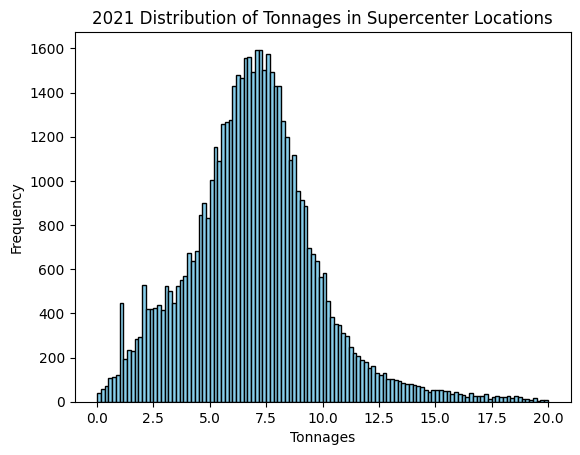

In [21]:


plt.hist(supercenter_21['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('2021 Distribution of Tonnages in Supercenter Locations')
plt.show()

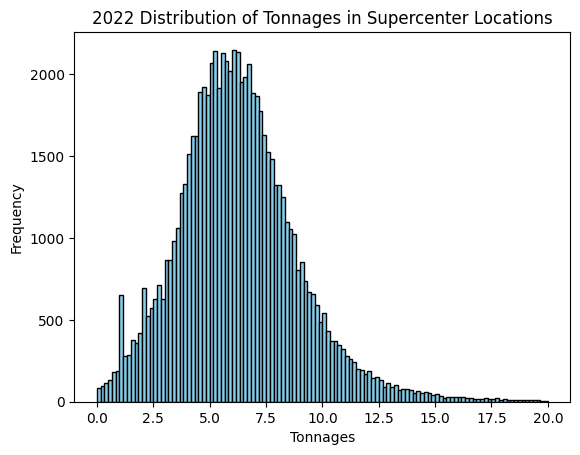

In [22]:
plt.hist(supercenter_22['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('2022 Distribution of Tonnages in Supercenter Locations')
plt.show()

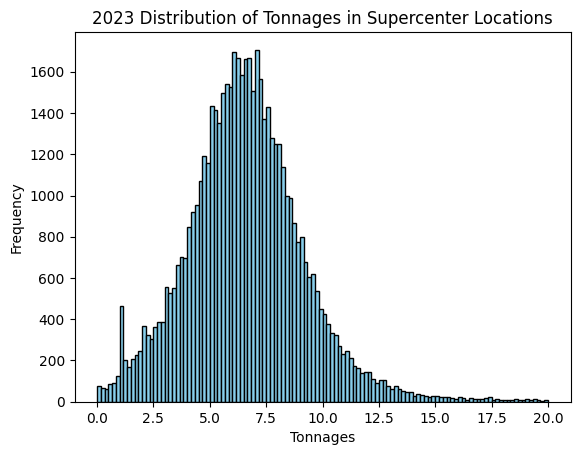

In [23]:
plt.hist(supercenter_23['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('2023 Distribution of Tonnages in Supercenter Locations')
plt.show()

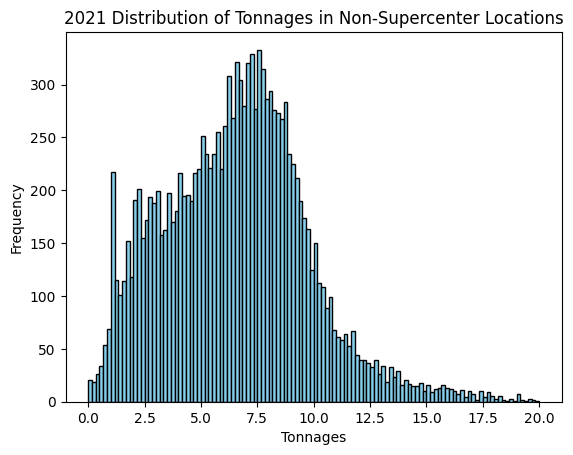

In [24]:
plt.hist(non_supercenter_21['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('2021 Distribution of Tonnages in Non-Supercenter Locations')
plt.show()

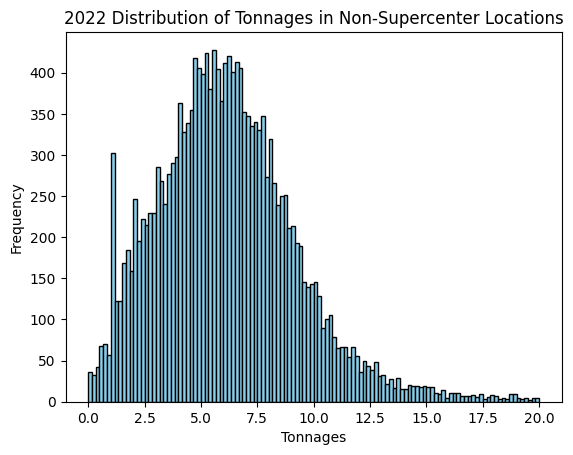

In [25]:
plt.hist(non_supercenter_22['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('2022 Distribution of Tonnages in Non-Supercenter Locations')
plt.show()

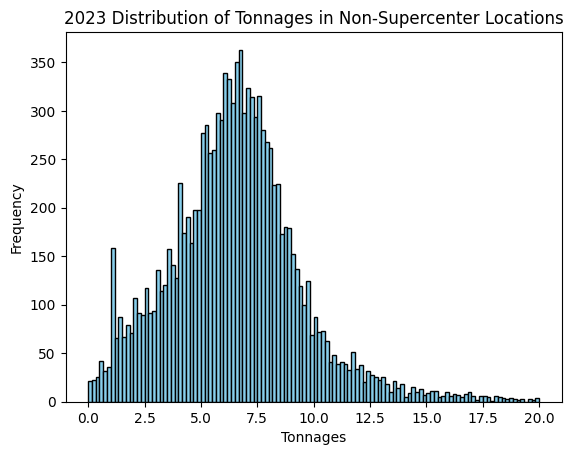

In [26]:
plt.hist(non_supercenter_23['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('2023 Distribution of Tonnages in Non-Supercenter Locations')
plt.show()

Calculating Mean & SD

In [27]:
print(len(supercenter_df['Location ID'].unique()))
print(len(non_supercenter_df['Location ID'].unique()))

2723
958


In [28]:
supercenter_mean = supercenter_df['Tonnage'].mean()
supercenter_std = supercenter_df['Tonnage'].std()
print(supercenter_mean)
print(supercenter_std)
print(supercenter_mean + 2 * supercenter_std)


6.67409996776966
3.927008587878273
14.528117143526206


In [29]:
non_supercenter_mean = non_supercenter_df['Tonnage'].mean()
non_supercenter_std = non_supercenter_df['Tonnage'].std()
print(non_supercenter_mean)
print(non_supercenter_std)
print(non_supercenter_mean + 2 * non_supercenter_std)


6.452552078532584
3.3277929764617764
13.108138031456136


In [30]:
#removing tonnages _ SD above mean
SD_var = 2
supercenter_above_SD_removed = supercenter_df[supercenter_df['Tonnage'] <= supercenter_mean + (supercenter_std * SD_var)]
non_supercenter_above_SD_removed = non_supercenter_df[non_supercenter_df['Tonnage'] <= non_supercenter_mean + (non_supercenter_std * SD_var)]

#keeping a DF of tonnages above _ SD to save the location IDs
supercenter_below_SD_removed = supercenter_df[supercenter_df['Tonnage'] > supercenter_mean + (supercenter_std * SD_var)]
non_supercenter_below_SD_removed = non_supercenter_df[non_supercenter_df['Tonnage'] > non_supercenter_mean + (non_supercenter_std * SD_var)]
bad_supercenters = supercenter_below_SD_removed['Location ID']
bad_non_supercenters = non_supercenter_below_SD_removed['Location ID']


#removing stores from the df if their location IDs are in the df with tonnages _ SD above mean
super_above_SD_with_stores_removed = supercenter_above_SD_removed[~supercenter_above_SD_removed['Location ID'].isin(supercenter_below_SD_removed['Location ID'].unique())]
non_super_above_SD_with_stores_removed = non_supercenter_above_SD_removed[~non_supercenter_above_SD_removed['Location ID'].isin(non_supercenter_below_SD_removed['Location ID'].unique())]


print(super_above_SD_with_stores_removed['Location ID'].unique().shape[0])
print(non_super_above_SD_with_stores_removed['Location ID'].unique().shape[0])

percent_superstores_remaining = len(super_above_SD_with_stores_removed['Location ID'].unique()) / len(supercenter_df['Location ID'].unique())
percent_non_superstores_remaining = len(non_super_above_SD_with_stores_removed['Location ID'].unique()) / len(non_supercenter_df['Location ID'].unique())
print(percent_superstores_remaining)
print(percent_non_superstores_remaining)

1532
563
0.5626147631289019
0.5876826722338204


In [31]:
bad_supercenters = bad_supercenters.drop_duplicates()
bad_non_supercenters = bad_non_supercenters.drop_duplicates()
#bad_supercenters.to_csv('bad_supercenters.csv', index=False)
#bad_non_supercenters.to_csv('bad_non_supercenters.csv', index=False)

In [32]:
#List of Stored IDS REMOVED
list_of_storeids_sup = super_above_SD_with_stores_removed['Location ID'].unique().tolist()
list_of_storeids_non = non_super_above_SD_with_stores_removed['Location ID'].unique().tolist()

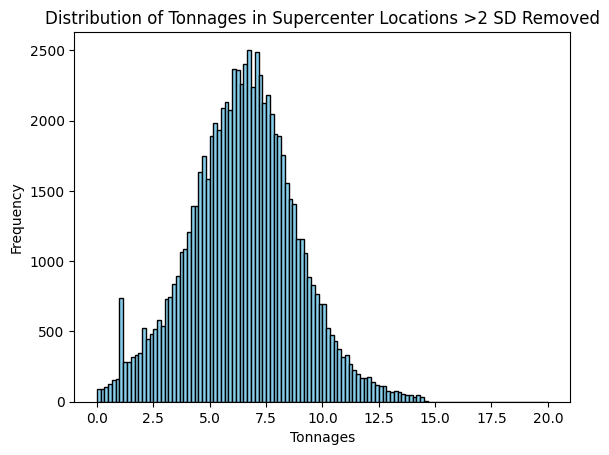

In [33]:
plt.hist(super_above_SD_with_stores_removed['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('Distribution of Tonnages in Supercenter Locations >2 SD Removed')
plt.show()

#wow

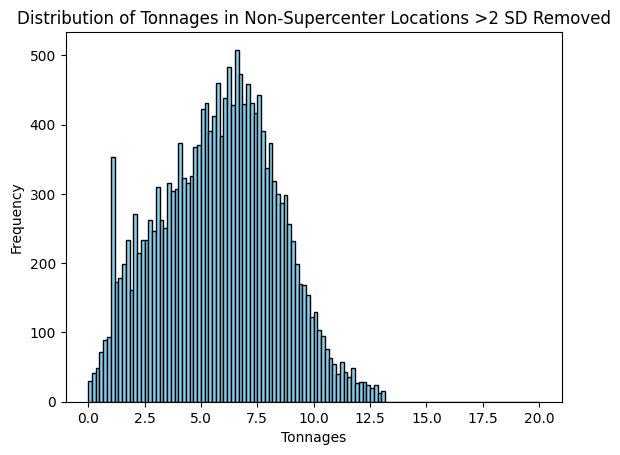

In [34]:
plt.hist(non_super_above_SD_with_stores_removed['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('Distribution of Tonnages in Non-Supercenter Locations >2 SD Removed')
plt.show()

In [35]:
super_pickup_mean = supercenter_df['Days Since Last Pickup'].mean()
super_pickup_std = supercenter_df['Days Since Last Pickup'].std()
print(super_pickup_mean)
print(super_pickup_std)
print(super_pickup_mean + 2 * super_pickup_std)

11.90475749167289
22.229073120714308
56.362903733101504


In [36]:
non_super_pickup_mean = non_supercenter_df['Days Since Last Pickup'].mean()
non_super_pickup_std = non_supercenter_df['Days Since Last Pickup'].std()
print(non_super_pickup_mean)
print(non_super_pickup_std)
print(non_super_pickup_mean + 2 * non_super_pickup_std)

17.01585842876667
19.252434327125073
55.520727083016816


In [37]:
#removing avg pickup frequences _ SD above mean
SD_var2 = 2
super_pickup_above_SD_removed = supercenter_df[supercenter_df['Days Since Last Pickup'] <= super_pickup_mean + (super_pickup_std * SD_var2)]
non_super_pickup_above_SD_removed = non_supercenter_df[non_supercenter_df['Tonnage'] <= non_super_pickup_mean + (non_super_pickup_std * SD_var2)]

#keeping a DF of tonnages above _ SD to save the location IDs
super_pickup_below_SD_removed = supercenter_df[supercenter_df['Days Since Last Pickup'] > super_pickup_mean + (super_pickup_std * SD_var2)]
non_super_pickup_below_SD_removed = non_supercenter_df[non_supercenter_df['Days Since Last Pickup'] > non_super_pickup_mean + (non_super_pickup_std * SD_var2)]
bad_supercenters_pickup = super_pickup_below_SD_removed['Location ID']
bad_non_supercenters_pickup = non_super_pickup_below_SD_removed['Location ID']

#removing stores from the df if their location IDs are in the df with tonnages _ SD above mean
super_pickup_above_SD_with_stores_removed = super_pickup_above_SD_removed[~super_pickup_above_SD_removed['Location ID'].isin(super_pickup_below_SD_removed['Location ID'].unique())]
non_super_pickup_above_SD_with_stores_removed = non_super_pickup_above_SD_removed[~non_super_pickup_above_SD_removed['Location ID'].isin(non_super_pickup_below_SD_removed['Location ID'].unique())]


print(super_pickup_above_SD_with_stores_removed['Location ID'].unique().shape[0])
print(non_super_pickup_above_SD_with_stores_removed['Location ID'].unique().shape[0])

percent_superstores_remaining_pickup = len(super_pickup_above_SD_with_stores_removed['Location ID'].unique()) / len(supercenter_df['Location ID'].unique())
percent_non_superstores_remaining_pickup = len(non_super_pickup_above_SD_with_stores_removed['Location ID'].unique()) / len(non_supercenter_df['Location ID'].unique())
print(percent_superstores_remaining_pickup)
print(percent_non_superstores_remaining_pickup)

2050
527
0.7528461255967682
0.5501043841336117


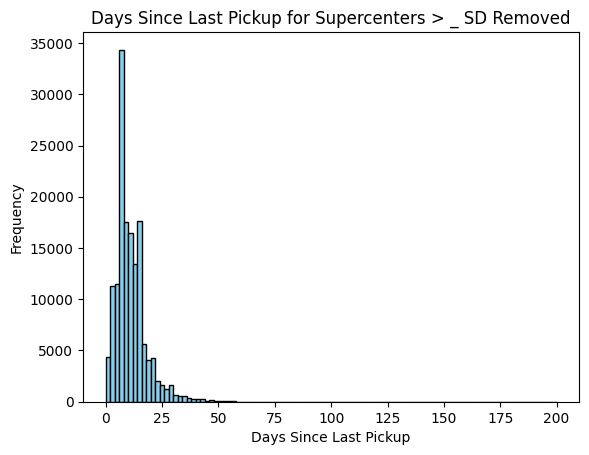

In [38]:
plt.hist(super_pickup_above_SD_with_stores_removed['Days Since Last Pickup'], bins=100, range=(0, 200), color='skyblue', edgecolor='black')
plt.xlabel('Days Since Last Pickup')
plt.ylabel('Frequency')
plt.title('Days Since Last Pickup for Supercenters > _ SD Removed')
plt.show()

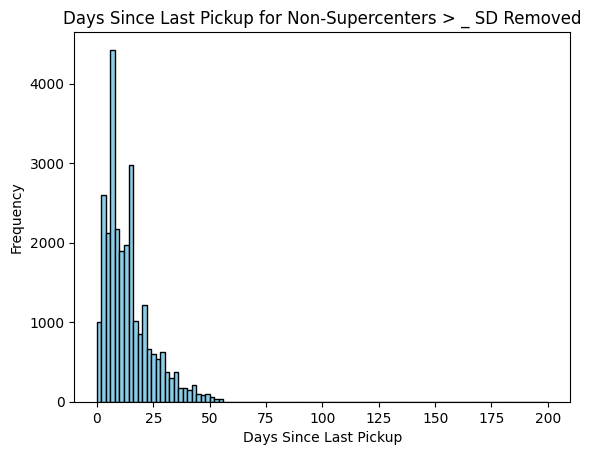

In [39]:
plt.hist(non_super_pickup_above_SD_with_stores_removed['Days Since Last Pickup'], bins=100, range=(0, 200), color='skyblue', edgecolor='black')
plt.xlabel('Days Since Last Pickup')
plt.ylabel('Frequency')
plt.title('Days Since Last Pickup for Non-Supercenters > _ SD Removed')
plt.show()

In [40]:
bad_supercenters_pickup = bad_supercenters_pickup.drop_duplicates()
bad_non_supercenters_pickup = bad_non_supercenters_pickup.drop_duplicates()
#bad_supercenters_pickup.to_csv('bad_supercenters_pickup.csv', index=False)
#bad_non_supercenters_pickup.to_csv('bad_non_supercenters_pickup.csv', index=False)

In [41]:
list_of_storeids_sup_pickup = super_pickup_above_SD_with_stores_removed['Location ID'].unique().tolist()
list_of_storeids_non_pickup = non_super_pickup_above_SD_with_stores_removed['Location ID'].unique().tolist()

In [42]:
good_super_stores = list(set(list_of_storeids_sup_pickup).intersection(list_of_storeids_sup))
good_non_super_stores = list(set(list_of_storeids_non_pickup).intersection(list_of_storeids_non))
print(good_super_stores)
print(good_non_super_stores)

# Convert lists to pandas Series
good_super_stores_series = pd.Series(good_super_stores)
good_non_super_stores_series = pd.Series(good_non_super_stores)

# Save the series to CSV files
#good_super_stores_series.to_csv('good_super_stores.csv', index=False)
#good_non_super_stores_series.to_csv('good_non_super_stores.csv', index=False)


[2049, 2051, 4101, 4102, 7, 10, 2059, 12, 13, 14, 2061, 16, 17, 18, 19, 20, 2062, 4115, 23, 24, 30, 2080, 34, 35, 4131, 37, 39, 2087, 41, 42, 43, 45, 48, 2096, 4144, 2100, 54, 55, 2102, 2105, 58, 4153, 2108, 4156, 63, 2113, 66, 2114, 68, 2115, 70, 4162, 72, 4166, 2124, 77, 2125, 79, 2127, 81, 82, 2131, 85, 2133, 88, 91, 92, 95, 99, 2147, 2149, 102, 4195, 2153, 106, 4201, 4203, 111, 112, 113, 2159, 4208, 118, 2166, 120, 2169, 122, 4216, 124, 125, 126, 127, 130, 2178, 134, 4232, 2185, 138, 139, 4235, 141, 4237, 2191, 145, 2193, 2195, 4243, 150, 2201, 2204, 2205, 4252, 4256, 2209, 4257, 2211, 168, 169, 2223, 179, 4277, 2230, 188, 189, 2238, 4284, 192, 4286, 4288, 196, 198, 199, 2250, 4299, 204, 2252, 2256, 2261, 2262, 2263, 216, 2266, 220, 221, 222, 224, 2273, 2274, 4321, 4323, 4325, 231, 237, 4334, 239, 4335, 4336, 242, 243, 4337, 2293, 246, 4341, 6392, 2299, 253, 254, 2307, 4355, 262, 2311, 264, 2313, 4358, 2318, 2323, 278, 4377, 2330, 4381, 287, 2338, 2339, 2340, 4389, 294, 295, 296, 2

In [46]:
total_percent_superstores_remaining = len(good_super_stores_series) / len(supercenter_df['Location ID'].unique())
total_percent_non_superstores_remaining = len(good_non_super_stores_series) / len(non_supercenter_df['Location ID'].unique())
print(len(good_super_stores_series))
print(len(good_non_super_stores_series))
print(total_percent_superstores_remaining)
print(total_percent_non_superstores_remaining)

1138
314
0.41792141020932794
0.3277661795407098
